In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [31]:
ratings = pd.read_csv(r"C:\Users\songu\Downloads\ratings.csv")
movies =  pd.read_csv(r"C:\Users\songu\Downloads\movies.csv")

In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
n_ratings = len(ratings)
n_movies = ratings["movieId"].nunique()
n_users = ratings["userId"].nunique()

print(f"Number of ratings are: {n_ratings}")
print(f"Number of total movies are: {n_movies}")
print(f"Number of total users are: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/ n_users,2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies,2)}")

Number of ratings are: 100836
Number of total movies are: 9724
Number of total users are: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


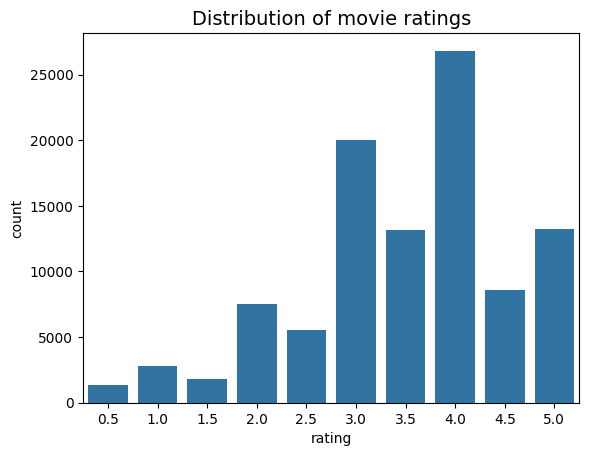

In [35]:
# Distribution of movie ratings(counting how many times each rating appears)
sns.countplot(x="rating", data = ratings)
plt.title("Distribution of movie ratings", fontsize = 14)
plt.show()

In [36]:
#Average of all ratings
print(f"Mean global ratings: {round(ratings['rating'].mean(),2)}")

Mean global ratings: 3.5


In [37]:
#One user with multiple ratings, so first line, one user and its mean of all ratings of that user. Second line is calculate over all, the mean score that each user of entire dataset give.
mean_ratings = ratings.groupby("userId")["rating"].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}")

Mean rating per user: 3.66


In [38]:
#In each movie (using movieID), how many time does it get rated? (Which movie are frequently rated?)
ratings['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
160341      1
160527      1
160836      1
163937      1
135534      1
Name: count, Length: 9724, dtype: int64

In [39]:
#Since the above show the number of ratings of each movie, but I cant see the name of the movie so I merge it. Reuse the value_counts and now I have it.
movie_ratings = ratings.merge(movies, on="movieId")
movie_ratings



,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [40]:
movie_ratings['title'].value_counts()[0:10]   #This only show the top 10

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

Lowest and highest rating movie

In [ ]:
#Lowest  rating
mean_ratings = ratings.groupby("movieId")[["rating"]].mean()
mean_ratings
lowest_rated = mean_ratings['rating'].idxmin()
movies[movies['movieId']==lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [ ]:
highest_rated = mean_ratings['rating'].idxmax() #returns the index label of the maximum value.
movies[movies['movieId']==highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


How many ratings does Lamerica has?

In [ ]:
ratings[ratings['movieId'] == highest_rated] 
#There are only two ratings for this number hence, its ratings so high.

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003


Using Bayesian Average to identify the fairness rating between the movie

In [48]:
movies_stat = ratings.groupby("movieId")["rating"].agg(["mean","count"])
movies_stat.head()

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [57]:
C = movies_stat["count"].mean()
M = movies_stat["mean"].mean()
print(f"Average of number of ratings for a given movie:{C:0.2f}")
print(f"Average rating of given movie:{M:0.2f} ")

def bayesian_avg(ratings):
    bayesian_avg = (C*M + ratings.sum()) / (C + ratings.count())
    return round(bayesian_avg,3)


Average of number of ratings for a given movie:10.37
Average rating of given movie:3.26 


In [ ]:
Testing with the Lamerica.

In [ ]:
Lamerica = pd.Series([5,5]) #Because the movie has 2 ratings = 5 so we assign as ([5,5]).
bayesian_avg(Lamerica)

np.float64(3.543)

Apply to entire dataset


In [ ]:
bayesian_avg_ratings = ratings.groupby("movieId")["rating"].agg(bayesian_avg).reset_index() #converts the DataFrame’s index into a regular column and restores a default integer index.
bayesian_avg_ratings.head()

,movieId,rating
0,1,3.891
1,2,3.417
2,3,3.260
3,4,2.898
4,5,3.105
